In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import scienceplots
import os

mpl.rcParams.update(mpl.rcParamsDefault)

# plt.style.use(['science', 'ieee'])

In [18]:
# Function to parse and organize datasets based on Id-Vg and Id-Vd
def parse_datasets(base_directory):
    dir_parts = os.path.basename(base_directory).split("_")

    voltage_type = dir_parts[0]
    temperature = float(dir_parts[1].split("=")[1])
    # doping = float(dir_parts[2].split("=")[1])
    doping = dir_parts[2].split("=")[1]
    if voltage_type == "Id-Vg":
        datasets = {"Vd=0.01": {}, "Vd=0.5": {}, "Vd=1":{}}
    elif voltage_type == "Id-Vd":
        datasets = {"Vg=0.5": {}, "Vg=1": {}, "Vg=1.5":{}}

    for root, _, files in os.walk(base_directory):
        for file in files:
            if file.endswith(".txt"):
                file_path = os.path.join(root, file)
                filename = os.path.basename(file_path)

                # Extract dimension, voltage type, and voltage value
                parts = filename.split("_")
                dimension = parts[0]  # Extract dimension (e.g., 5nm)
                # voltage_type = parts[1]  # Extract Id-Vg or Id-Vd
                voltage_value = float(parts[2].split("=")[1].replace(".txt", ""))  # Extract voltage value (e.g., 0.01)

                # Read the datas
                data = pd.read_csv(file_path, skiprows=4, names=["Voltage (V)", "Current (A)"])
                data["Voltage (V)"] = pd.to_numeric(data["Voltage (V)"], errors="coerce")
                data["Current (A)"] = pd.to_numeric(data["Current (A)"], errors="coerce")
    
                if voltage_type == "Id-Vg":
                    if voltage_value == 0.01:
                        datasets["Vd=0.01"].setdefault((dimension, voltage_value, temperature, doping, voltage_type), []).append(data)
                    elif voltage_value == 0.5:
                        datasets["Vd=0.5"].setdefault((dimension, voltage_value, temperature, doping, voltage_type), []).append(data)
                    elif voltage_value == 1:
                        datasets["Vd=1"].setdefault((dimension, voltage_value, temperature, doping, voltage_type), []).append(data)
                elif voltage_type == "Id-Vd":
                    if voltage_value == 0.5:
                        datasets["Vg=0.5"].setdefault((dimension, voltage_value, temperature, doping, voltage_type), []).append(data)
                    elif voltage_value == 1:
                        datasets["Vg=1"].setdefault((dimension, voltage_value, temperature, doping, voltage_type), []).append(data)
                    elif voltage_value == 1.5:
                        datasets["Vg=1.5"].setdefault((dimension, voltage_value, temperature, doping, voltage_type), []).append(data)

    return datasets

In [19]:
def plot_datasets(datasets, base_directory, log_scale: False):
    # save_directory  = f"plots/geometrical_parameters/{base_directory.split("/")[1]}"
    # os.makedirs(save_directory, exist_ok=True)

    # Define a consistent color map for dimensions
    color_map = {
        "5nm": "blue",
        "10nm": "green",
        "15nm": "orange"
    }

    for voltage_condition, dataset in datasets.items():
        plt.figure(figsize=(10, 6))
        for ((dimension, voltage_value, temperature, doping, voltage_type)), data_list in dataset.items():
            for i, data in enumerate(data_list):
                plt.plot(
                    data["Voltage (V)"], data["Current (A)"],
                    marker="o",
                    color=color_map.get(dimension, "pink"),  # Default to pink if dimension is not in color_map
                    label=f"{dimension}"
                        #   f"Temperature={temperature}K "
                        #   f"doping={doping}cm^-3"
                )
        plt.title(f"{voltage_type} Characteristics for {voltage_condition}, temperature {temperature}K and doping {doping}cm^-3")
        plt.xlabel("Voltage (V)")
        if log_scale == True:
            plt.ylabel("Current (A) (Log scale)")
        else:
            plt.ylabel("Current (A)")
        # Uncomment the next line if you want a logarithmic Y-axis
        if log_scale == True:    
            plt.yscale("log", base=10)
        plt.legend()
        plt.grid(True, which="both", linestyle="--", linewidth=0.5)
        if log_scale == True:
            save_directory  = f"plots/geometrical_parameters/log_scale/{base_directory.split("/")[1]}"
        else:
            save_directory  = f"plots/geometrical_parameters/natural_scale/{base_directory.split("/")[1]}"
        os.makedirs(save_directory, exist_ok=True)
        file_name = f"{voltage_type}_{voltage_condition}.png"
        file_path = os.path.join(save_directory, file_name)
        plt.savefig(file_path, format="png", dpi=300)

        plt.show()

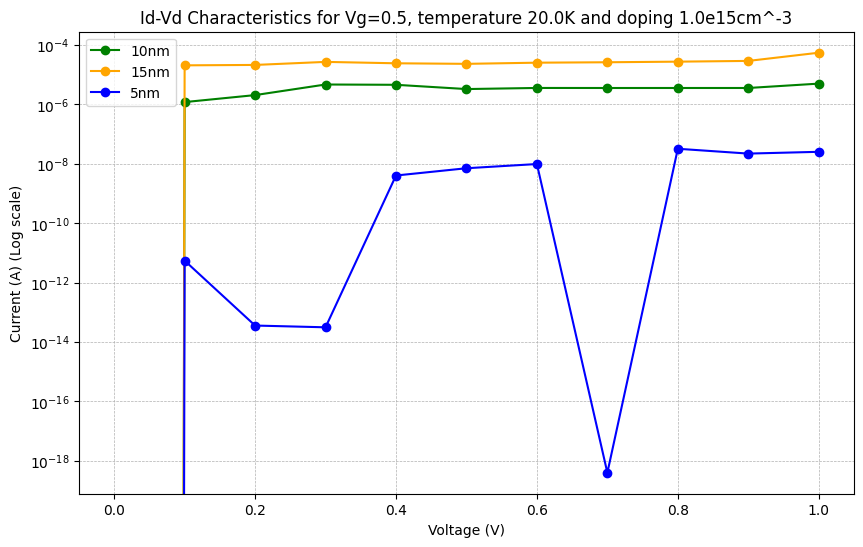

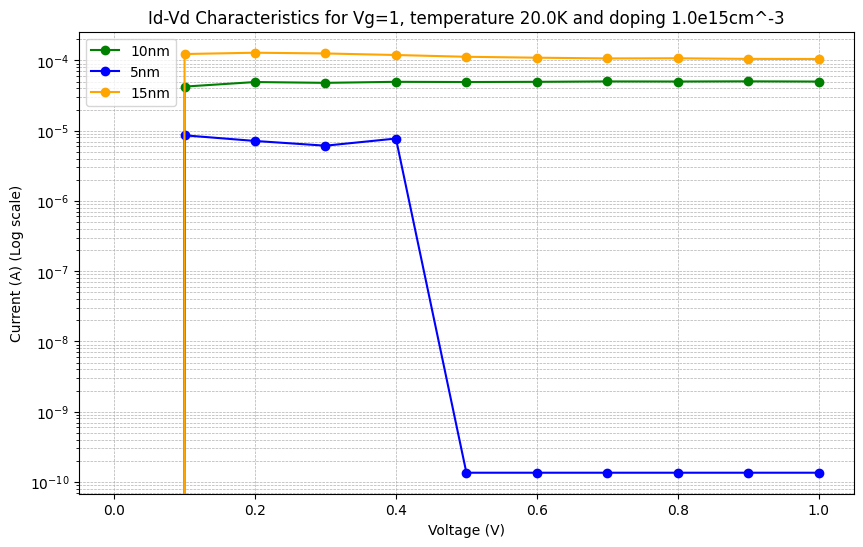

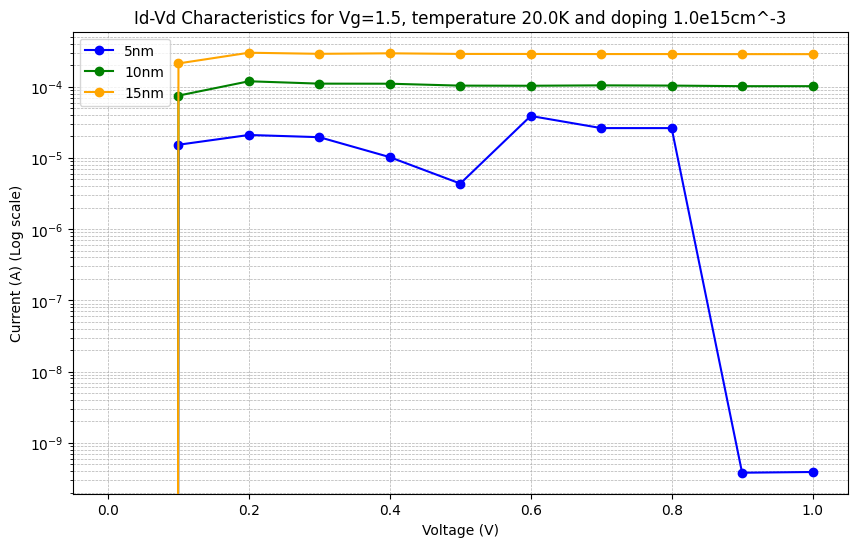

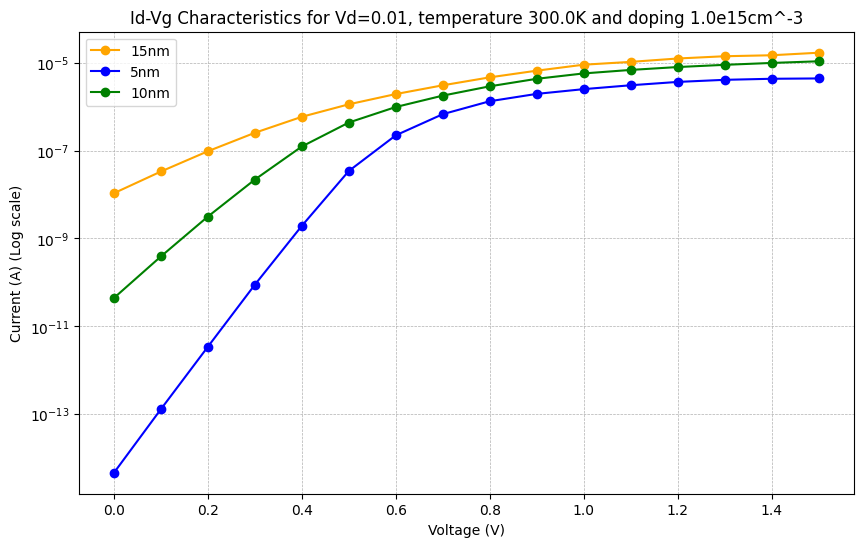

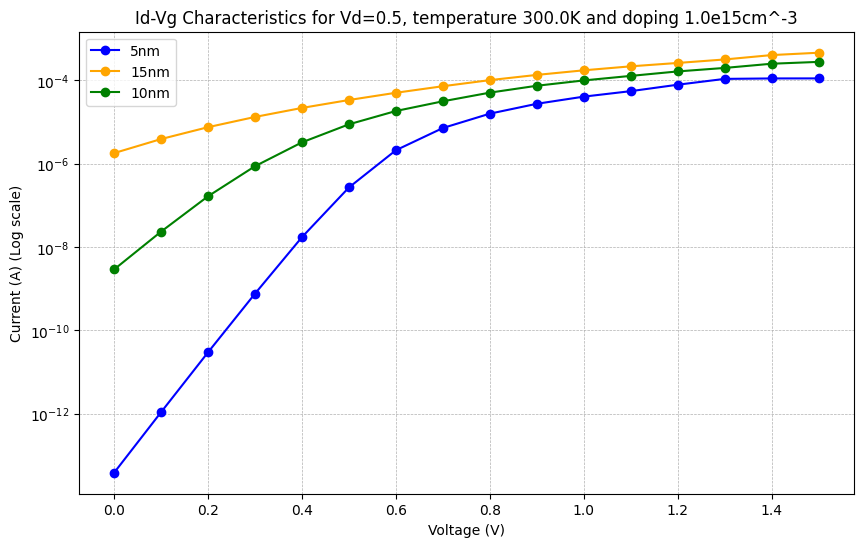

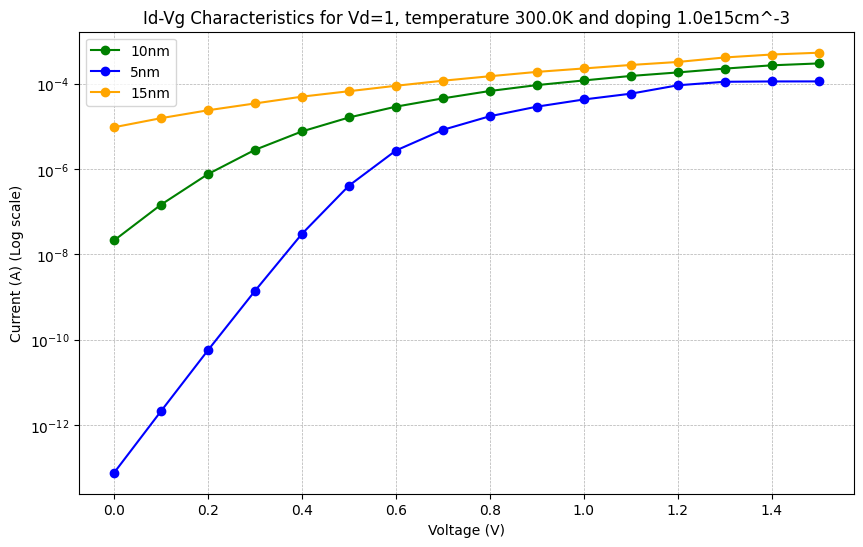

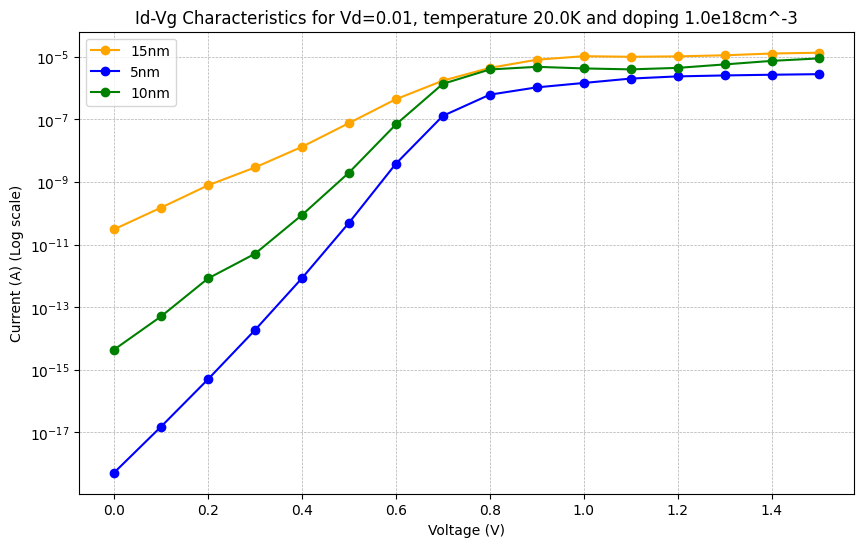

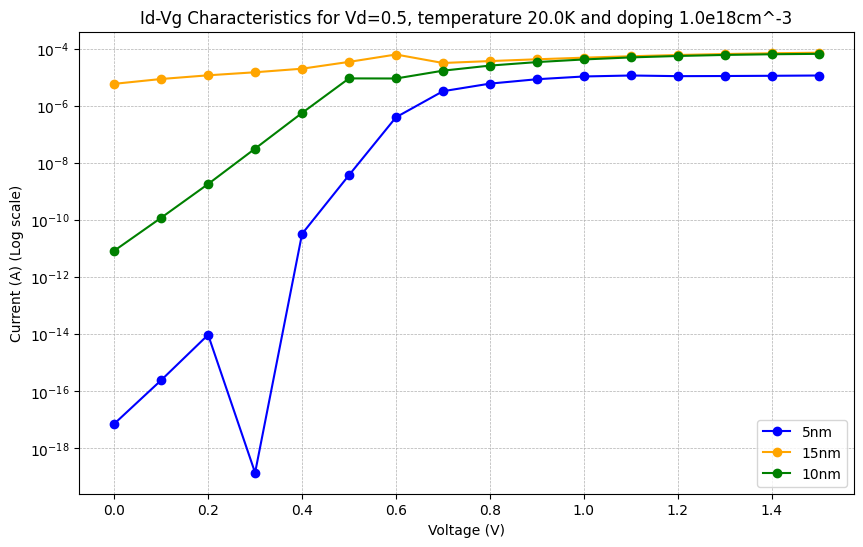

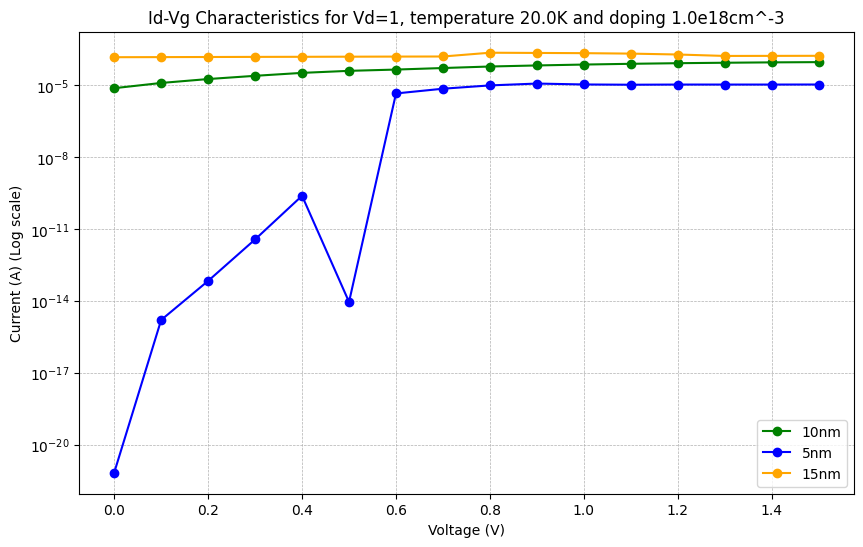

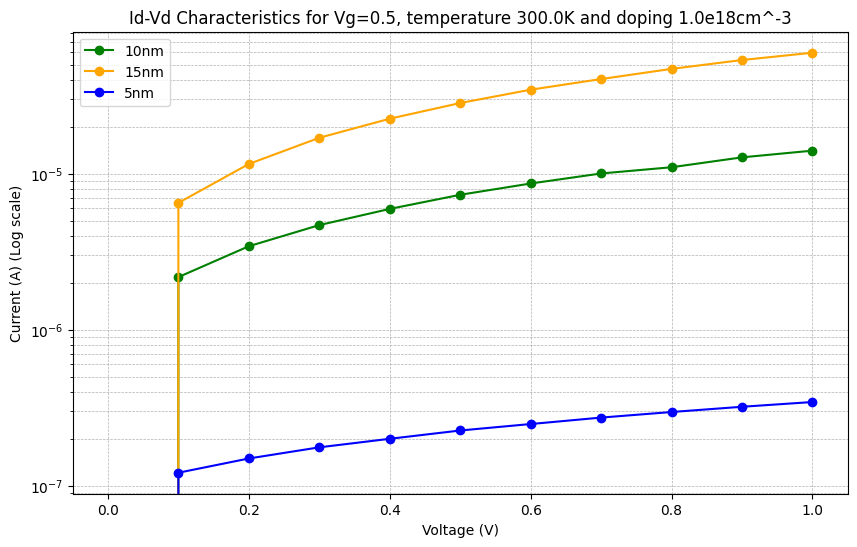

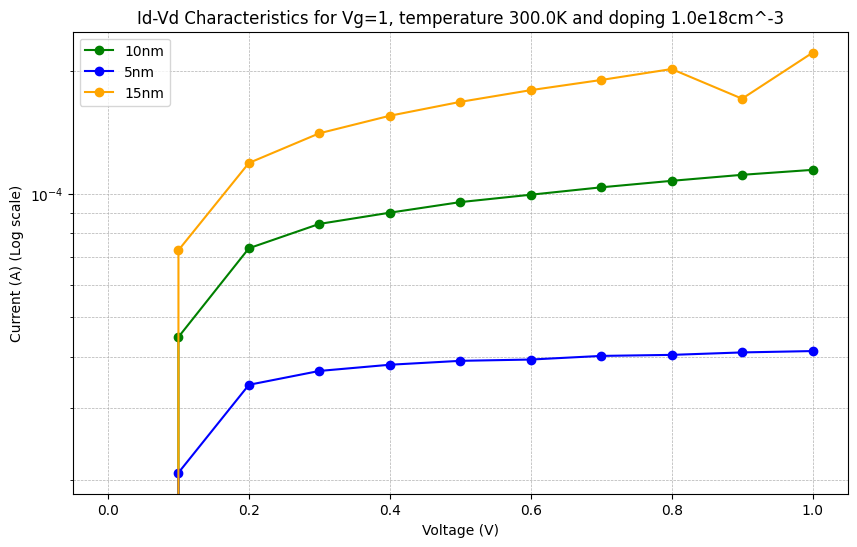

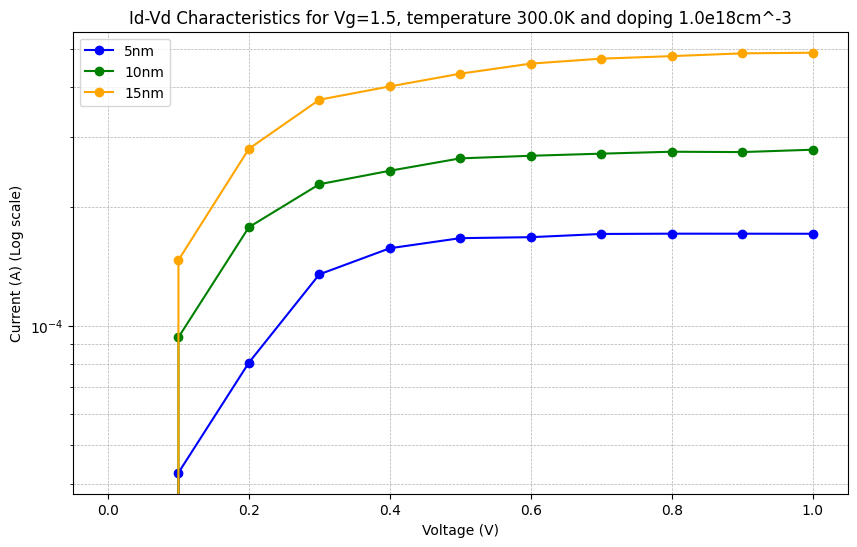

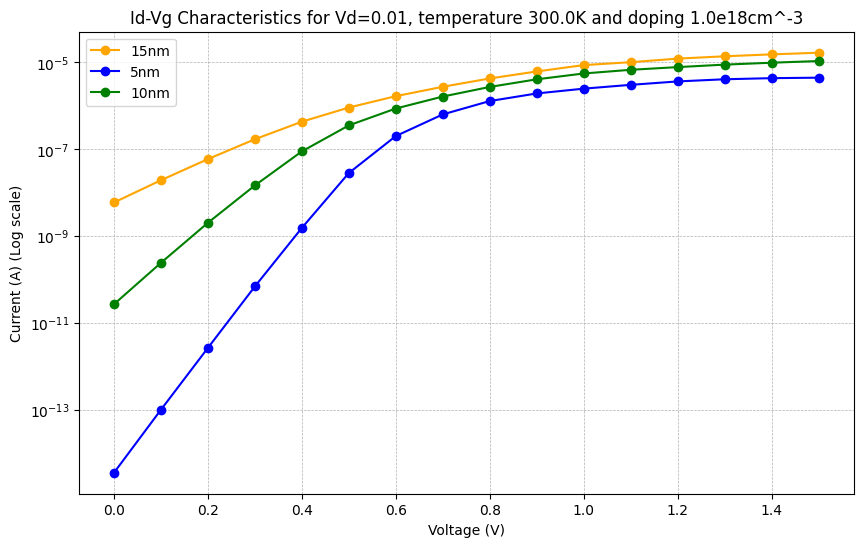

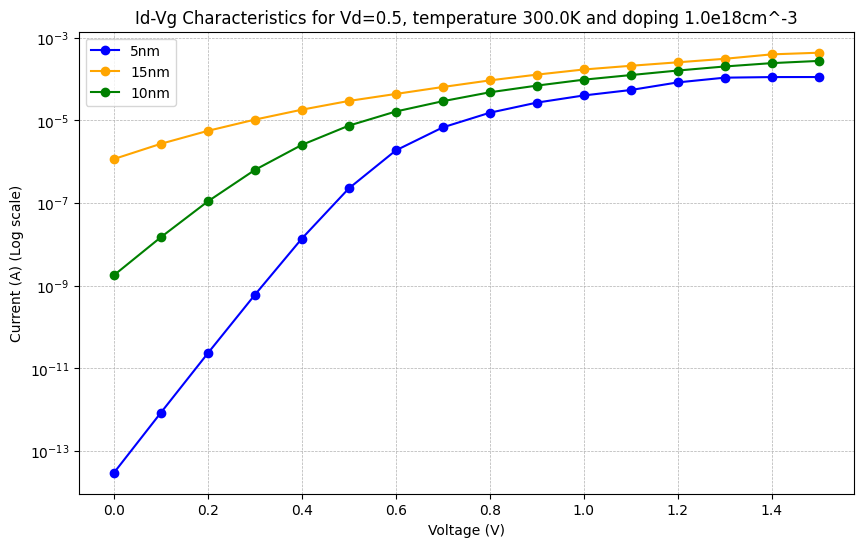

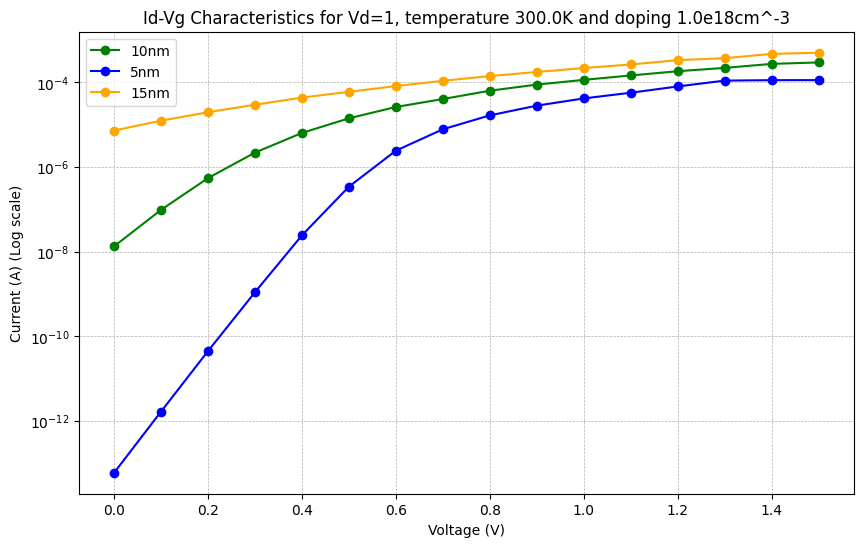

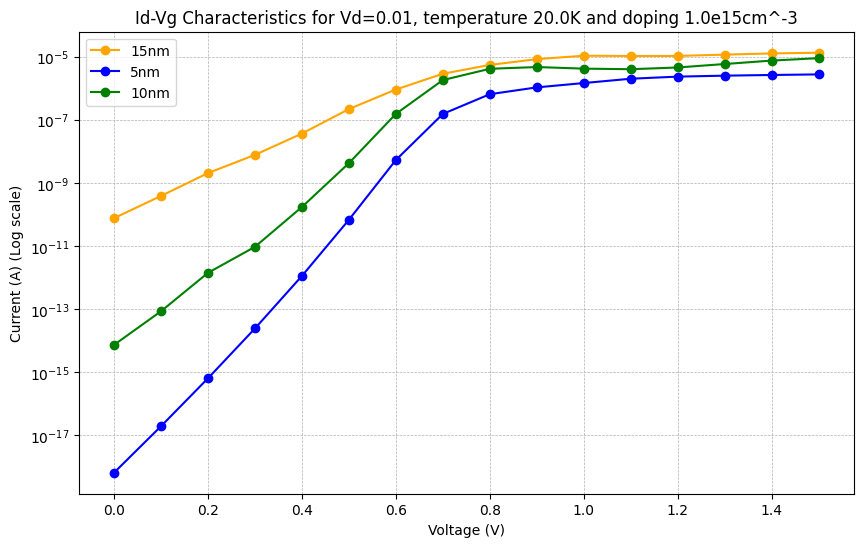

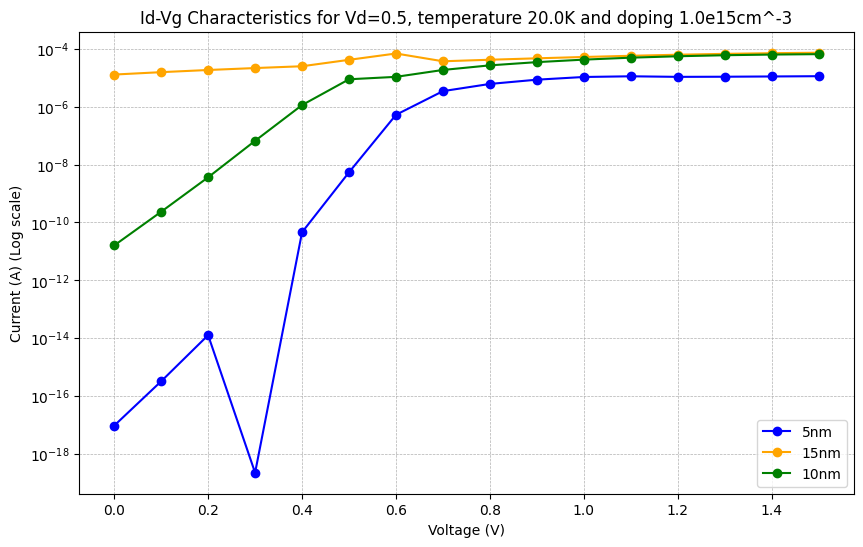

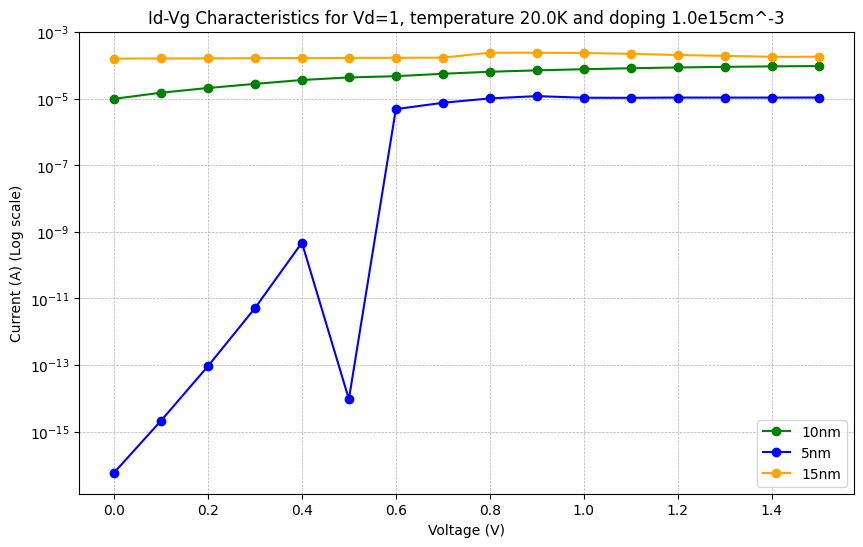

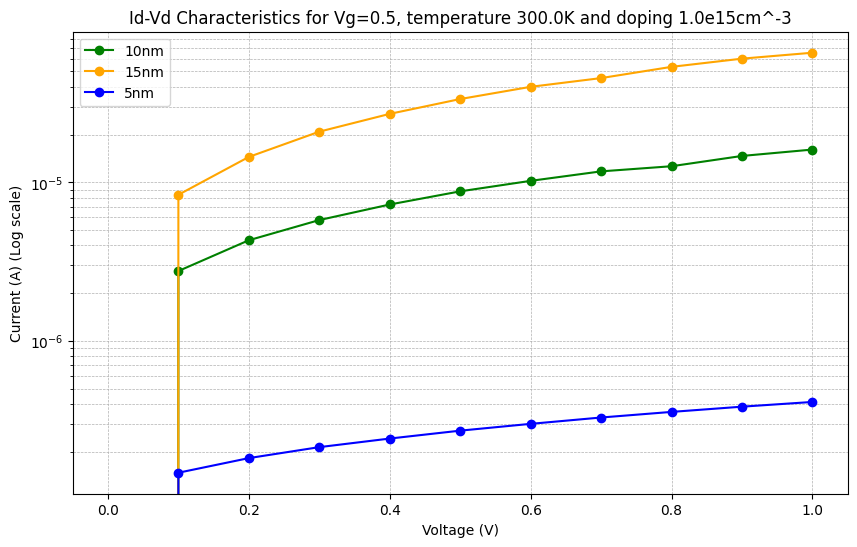

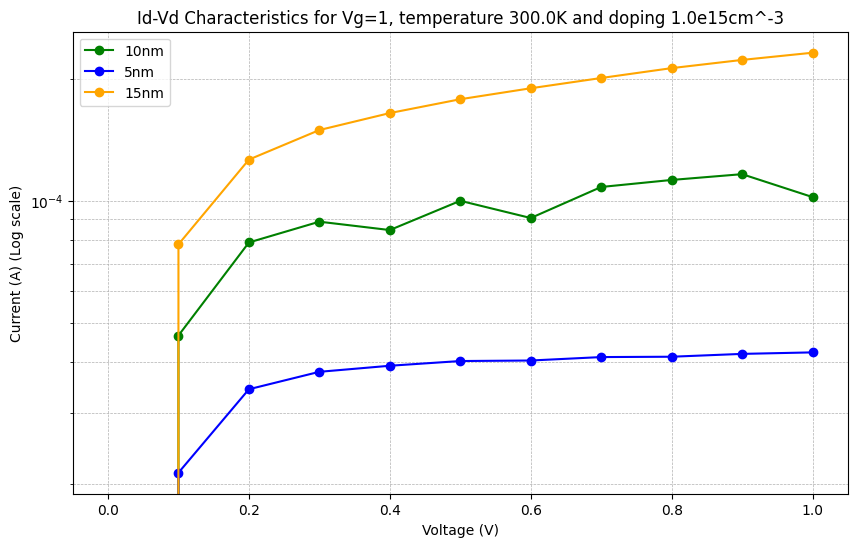

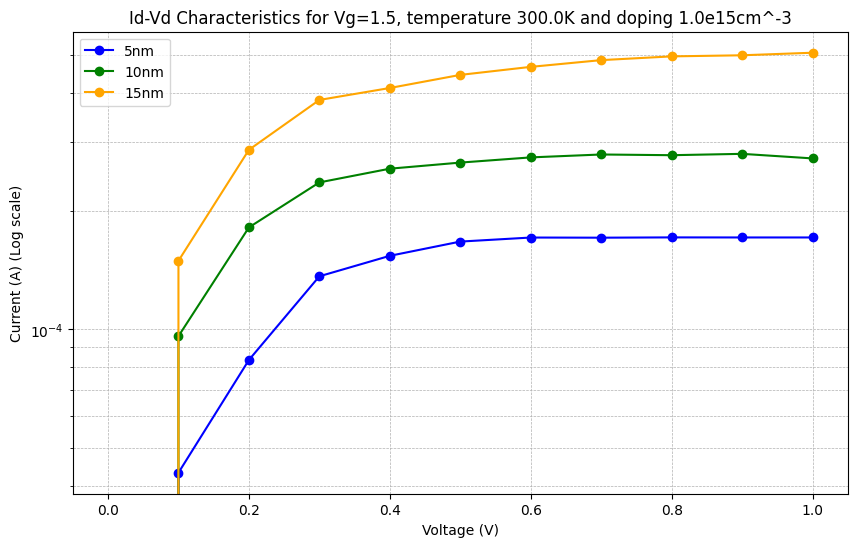

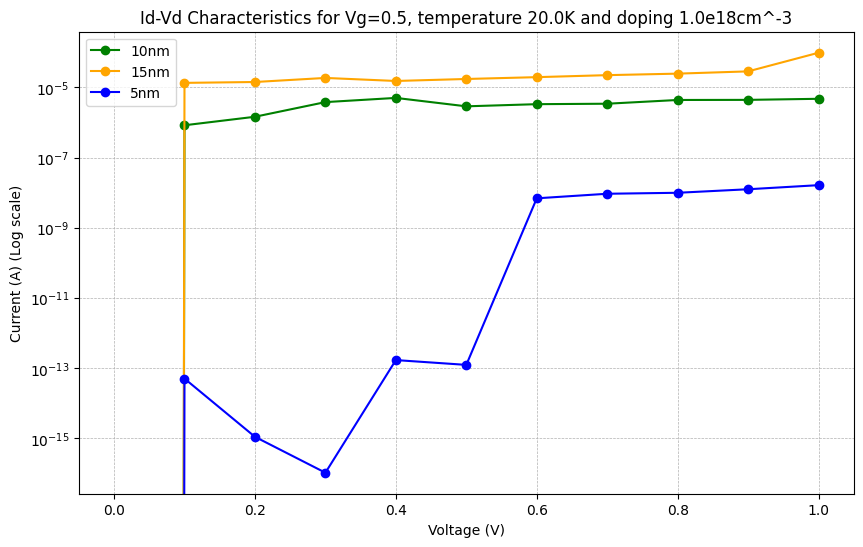

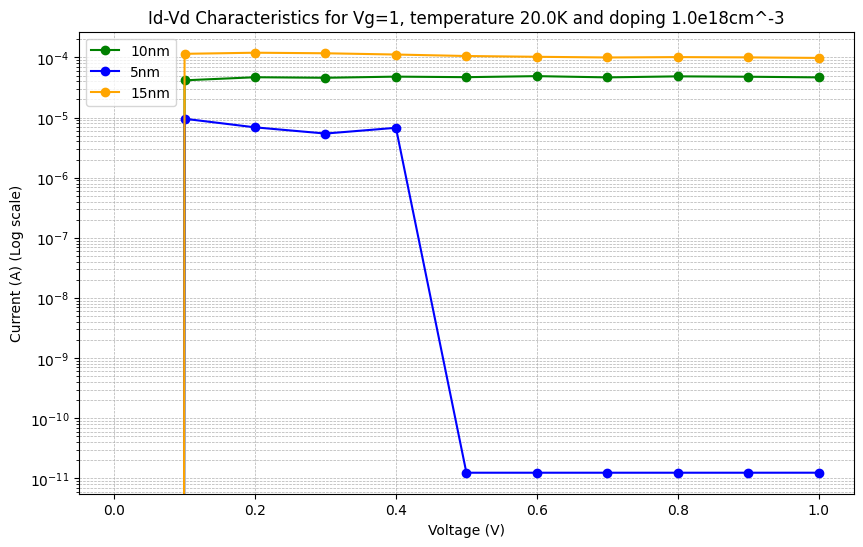

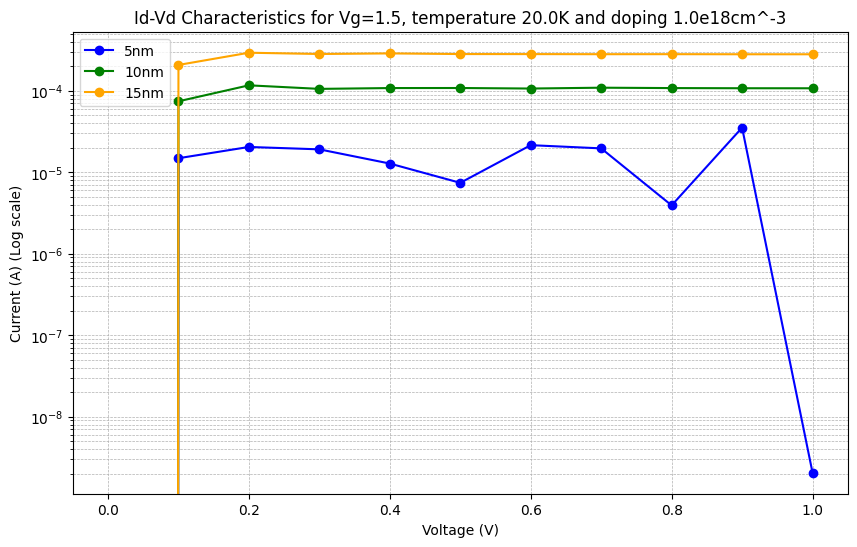

In [20]:
base_directory= "data"
i = 0
for path, folders, files in os.walk(base_directory):
    for folder_name in folders:
            if folder_name == "geometrical_parameters" or folder_name == "plots":
                continue
            data_directory = os.path.join(base_directory, folder_name)
            datasets = parse_datasets(data_directory)
            plot_datasets(datasets, data_directory, log_scale=True)